In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%reload_ext postcell
%postcell register

PostCell loaded
Loading config file from /Users/amt/Documents/GitHub/lectures/postcell.conf
Registered user Aman_Monolbaev at https://postcell.io/post_cell


In [3]:
%matplotlib inline

#### Generating sample data

In [4]:
#boiler plate code
student_scores_pd = pd.DataFrame(((np.random.rand(10,4) * 100) )
             , columns=['Assignment 1', 'Assignment 2', 'Test', 'Extra Credit']
             , index=['Homer', 'Marge', 'Bart', 'Lisa', 'Maggie', 'Jon', 'Arya', 'Ned', 'Danny', 'That red lady']
            )
student_scores_pd['Test'] *= 10
#student_scores_pd['Test2'] = 'hello'
student_scores_pd['Extra Credit'] = np.power(student_scores_pd['Extra Credit'], 2)/100
student_scores_pd = student_scores_pd.round()

student_scores_pd

,Assignment 1,Assignment 2,Test,Extra Credit
Homer,55.0,2.0,204.0,88.0
Marge,46.0,39.0,284.0,0.0
Bart,23.0,15.0,416.0,25.0
Lisa,49.0,91.0,804.0,2.0
Maggie,37.0,91.0,247.0,41.0
Jon,61.0,61.0,645.0,72.0
Arya,70.0,30.0,520.0,74.0
Ned,5.0,46.0,356.0,91.0
Danny,97.0,13.0,987.0,57.0
That red lady,33.0,92.0,240.0,1.0


# Pandas - dataframe operations

Much like series (and numpy), dataframes have _many_ built in mathematical operations. Calling an aggregating math function on a dataframe will return values, aggregated for each column:

In [5]:
student_scores_pd.to_numpy().sum()

np.float64(6110.0)

In [6]:
student_scores_pd.sum()

Assignment 1     476.0
Assignment 2     480.0
Test            4703.0
Extra Credit     451.0
dtype: float64

However, if you wanted to add up the two assignments and the test for each student, you would have to tell the sum function that you want to sum across a different axis:

In [7]:
student_scores_pd.sum(axis=1)

Homer             349.0
Marge             369.0
Bart              479.0
Lisa              946.0
Maggie            416.0
Jon               839.0
Arya              694.0
Ned               498.0
Danny            1154.0
That red lady     366.0
dtype: float64

In [8]:
student_scores_pd.sum(axis='columns')

Homer             349.0
Marge             369.0
Bart              479.0
Lisa              946.0
Maggie            416.0
Jon               839.0
Arya              694.0
Ned               498.0
Danny            1154.0
That red lady     366.0
dtype: float64

In [9]:
student_scores_pd.sum(axis='rows')

Assignment 1     476.0
Assignment 2     480.0
Test            4703.0
Extra Credit     451.0
dtype: float64

#### Detour: `...axis=?`

`axis=0` = `axis="rows"` and `axis=1` = `axis="columns"` . 

This is the rule which helps me the most:

`df.sum(axis='rows')` means you end up with value for each **column**

`df.sum(axis='columns')` means you end up with value for each **row**


Note that the default axis in Pandas functions is 0 or 'rows'. This means that, by default, functions will operate on rows or _go through each column_ , which will result in _one value per column_.

In [ ]:
student_scores_pd.mean()

In [ ]:
student_scores_pd.mean(axis=0)

In [ ]:
student_scores_pd.mean(axis='rows')

### Remove columns (and the 'axis' error related to it)

In [10]:
student_scores_pd

,Assignment 1,Assignment 2,Test,Extra Credit
Homer,55.0,2.0,204.0,88.0
Marge,46.0,39.0,284.0,0.0
Bart,23.0,15.0,416.0,25.0
Lisa,49.0,91.0,804.0,2.0
Maggie,37.0,91.0,247.0,41.0
Jon,61.0,61.0,645.0,72.0
Arya,70.0,30.0,520.0,74.0
Ned,5.0,46.0,356.0,91.0
Danny,97.0,13.0,987.0,57.0
That red lady,33.0,92.0,240.0,1.0


In [11]:
student_scores_pd.drop(['Test'])

KeyError: "['Test'] not found in axis"

In [12]:
student_scores_pd.drop(['Test'], axis=1)

,Assignment 1,Assignment 2,Extra Credit
Homer,55.0,2.0,88.0
Marge,46.0,39.0,0.0
Bart,23.0,15.0,25.0
Lisa,49.0,91.0,2.0
Maggie,37.0,91.0,41.0
Jon,61.0,61.0,72.0
Arya,70.0,30.0,74.0
Ned,5.0,46.0,91.0
Danny,97.0,13.0,57.0
That red lady,33.0,92.0,1.0


Most functions don't _mutate_ or change the original dataframe (unless you use the `inplace=True` argument):

In [13]:
student_scores_pd

,Assignment 1,Assignment 2,Test,Extra Credit
Homer,55.0,2.0,204.0,88.0
Marge,46.0,39.0,284.0,0.0
Bart,23.0,15.0,416.0,25.0
Lisa,49.0,91.0,804.0,2.0
Maggie,37.0,91.0,247.0,41.0
Jon,61.0,61.0,645.0,72.0
Arya,70.0,30.0,520.0,74.0
Ned,5.0,46.0,356.0,91.0
Danny,97.0,13.0,987.0,57.0
That red lady,33.0,92.0,240.0,1.0


```python
student_scores_pd.drop(['Test'], axis=1, inplace=True)

student_scores_pd = student_scores_pd.drop(['Test'], axis=1)

```

In [15]:
# inplace removes from view 
model.fit( df.drop. (columns = 'label'), df['label'])

SyntaxError: invalid syntax (1819193459.py, line 2)

### Common mathematical functions

Pandas has all the standard mathematical and statistical functions you might expect to find in a data science package such as `mean`, `sum`, `max`, `min`, `log`, etc.

**Example** Given the `student_scores_pd` dataframe below, standardize it so all values are between 0 and 1 using the Min-Max feature scaling formula at https://en.wikipedia.org/wiki/Normalization_(statistics) : 

note: scikit-learn provides an API to this: `MinMaxScaler()`

In [16]:
(student_scores_pd - student_scores_pd.min()) / (student_scores_pd.max() - student_scores_pd.min())

,Assignment 1,Assignment 2,Test,Extra Credit
Homer,0.543478,0.000000,0.000000,0.967033
Marge,0.445652,0.411111,0.102171,0.000000
Bart,0.195652,0.144444,0.270754,0.274725
Lisa,0.478261,0.988889,0.766284,0.021978
Maggie,0.347826,0.988889,0.054917,0.450549
Jon,0.608696,0.655556,0.563218,0.791209
Arya,0.706522,0.311111,0.403576,0.813187
Ned,0.000000,0.488889,0.194125,1.000000
Danny,1.000000,0.122222,1.000000,0.626374
That red lady,0.304348,1.000000,0.045977,0.010989


Is it scaling the whole dataset as a single matrix or is it doing the right thing, and scaling each column?

In [17]:
tmp_df = pd.DataFrame()
for c in student_scores_pd.columns:
    tmp_df[c] = (student_scores_pd[c] - student_scores_pd[c].min()) / (student_scores_pd[c].max() - student_scores_pd[c].min())

In [18]:
tmp_df

,Assignment 1,Assignment 2,Test,Extra Credit
Homer,0.543478,0.000000,0.000000,0.967033
Marge,0.445652,0.411111,0.102171,0.000000
Bart,0.195652,0.144444,0.270754,0.274725
Lisa,0.478261,0.988889,0.766284,0.021978
Maggie,0.347826,0.988889,0.054917,0.450549
Jon,0.608696,0.655556,0.563218,0.791209
Arya,0.706522,0.311111,0.403576,0.813187
Ned,0.000000,0.488889,0.194125,1.000000
Danny,1.000000,0.122222,1.000000,0.626374
That red lady,0.304348,1.000000,0.045977,0.010989


**Question** Why aren't the two datasets different?

### Simple transformations

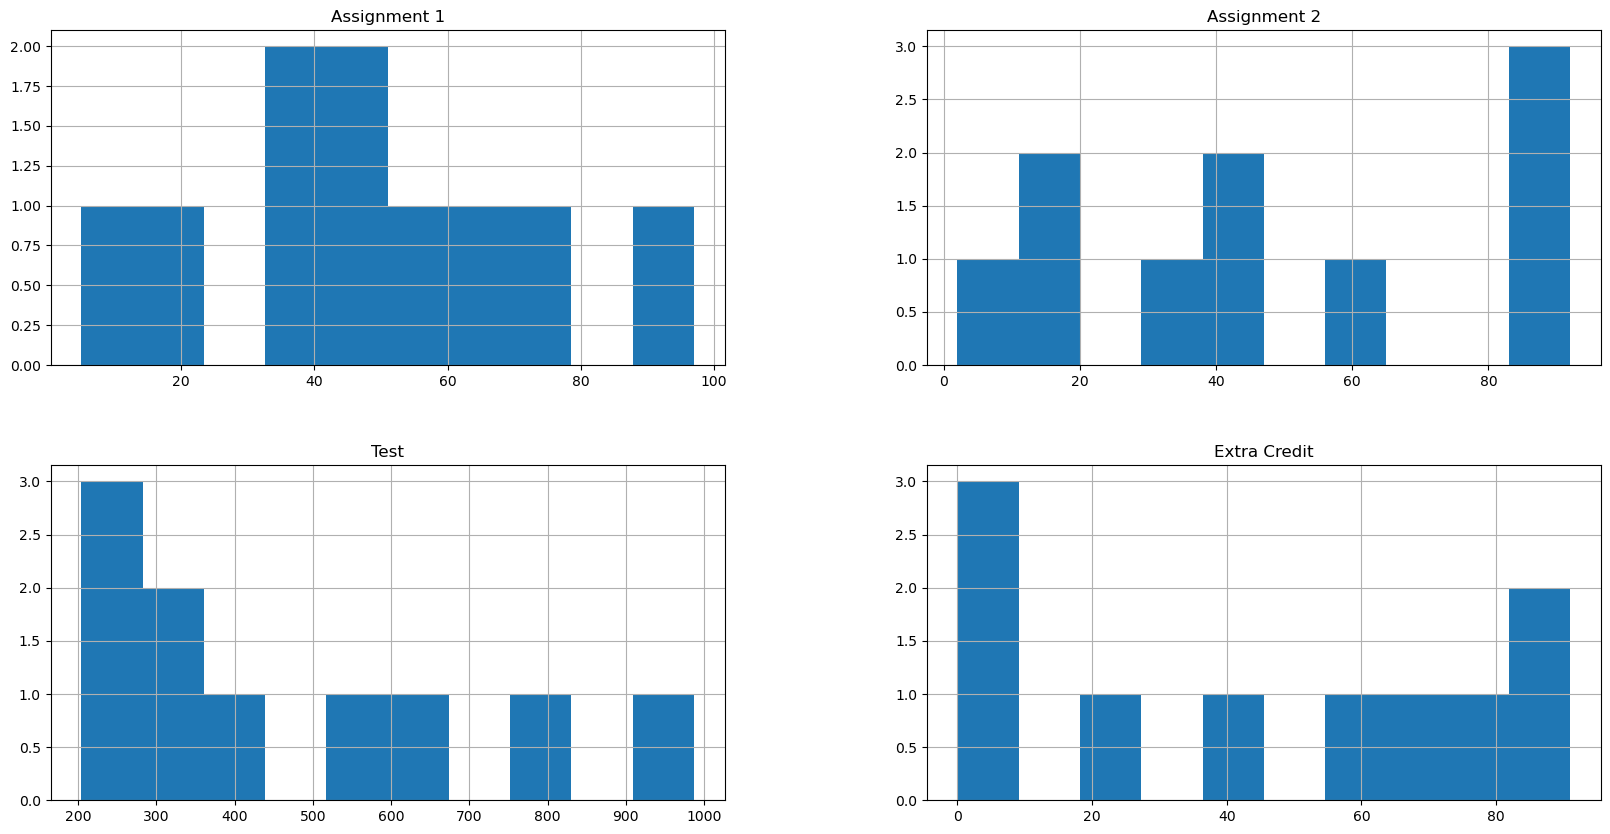

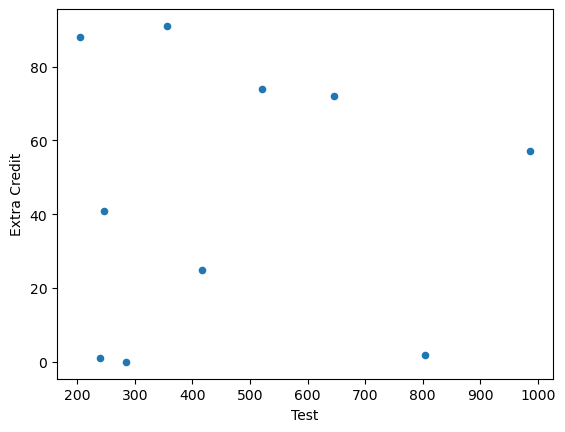

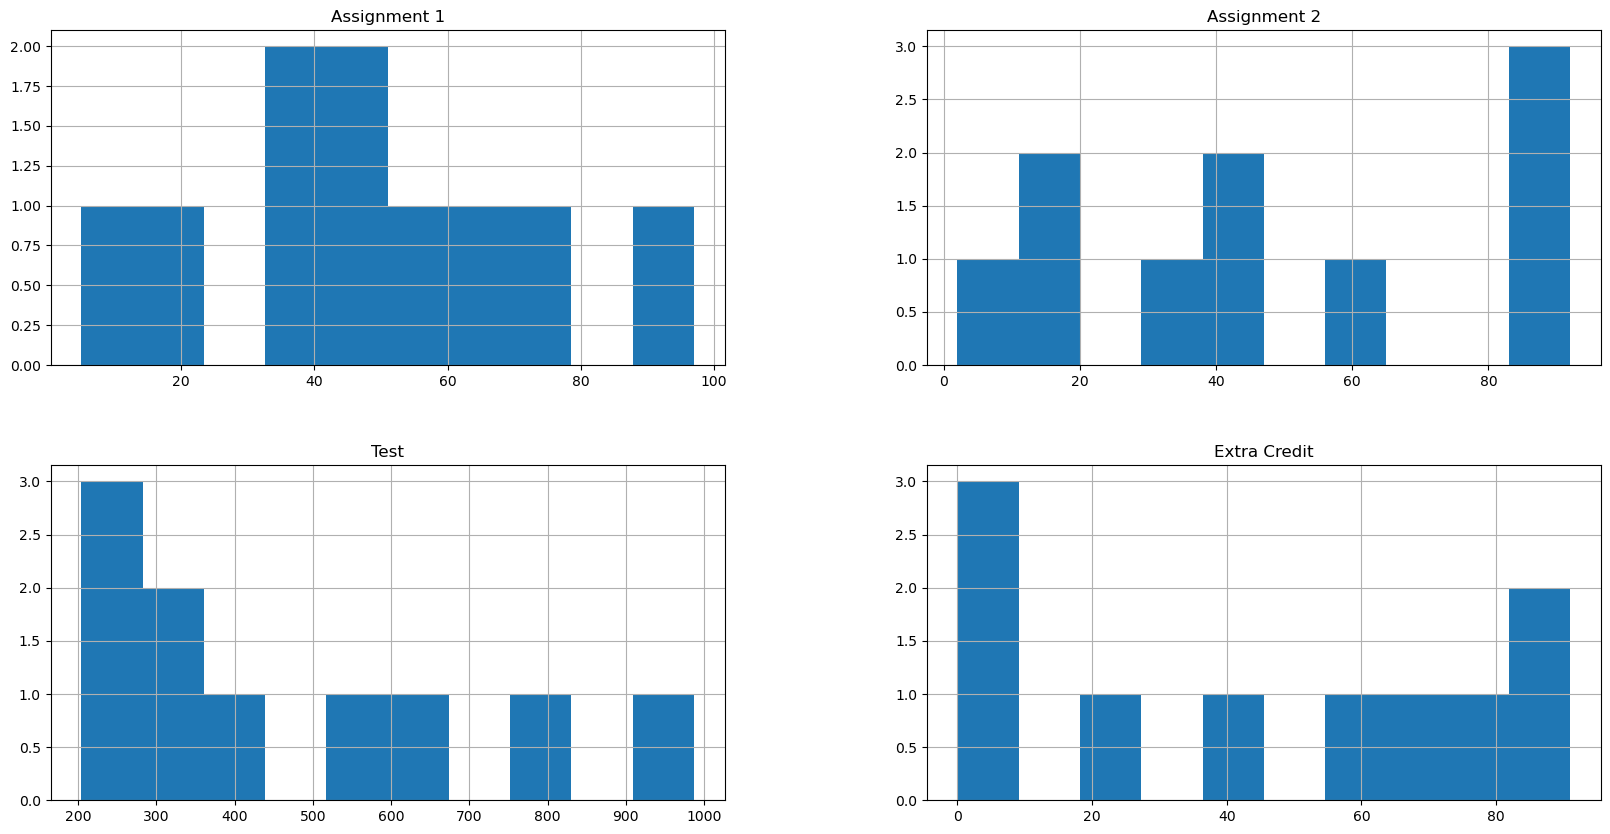

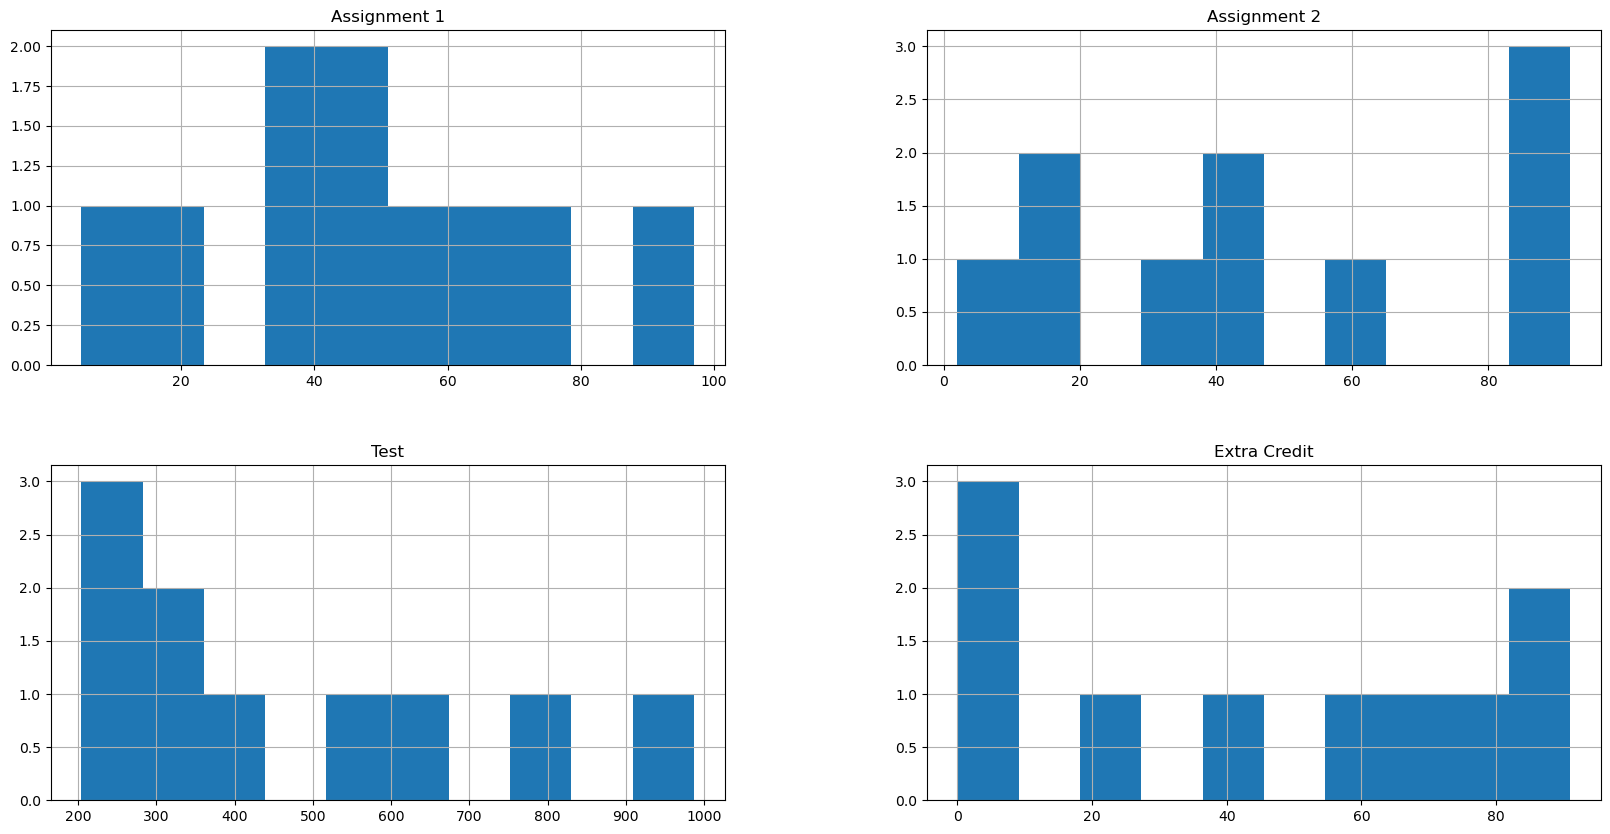

In [22]:
student_scores_pd.hist(figsize=(20,10));
plt.show()

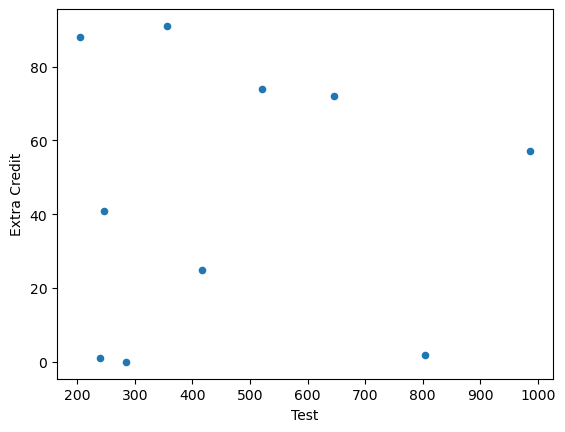

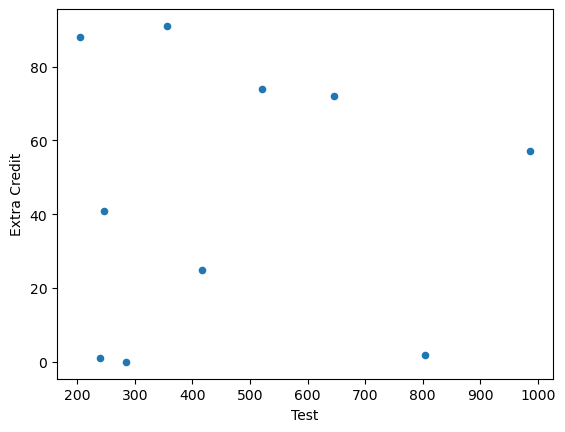

In [24]:
student_scores_pd.plot.scatter(x='Test', y='Extra Credit')
plt.show()

**Exercise** Looks like the `Extra Credit` column in `student_scores_pd` may need to be log scaled. Please do so.

In [ ]:
%%postcell exercise_030_130_a

#type your answer here

### Sort a dataframe

In [ ]:
student_scores_pd

We can sort a table by a column, in either ascending or decending manner

In [25]:
student_scores_pd.sort_values(by='Test', ascending=False)

,Assignment 1,Assignment 2,Test,Extra Credit
Danny,97.0,13.0,987.0,57.0
Lisa,49.0,91.0,804.0,2.0
Jon,61.0,61.0,645.0,72.0
Arya,70.0,30.0,520.0,74.0
Bart,23.0,15.0,416.0,25.0
Ned,5.0,46.0,356.0,91.0
Marge,46.0,39.0,284.0,0.0
Maggie,37.0,91.0,247.0,41.0
That red lady,33.0,92.0,240.0,1.0
Homer,55.0,2.0,204.0,88.0


In [26]:
student_scores_pd.sort_values(by=['Test', 'Assignment 1', 'Extra Credit'], ascending=False)

,Assignment 1,Assignment 2,Test,Extra Credit
Danny,97.0,13.0,987.0,57.0
Lisa,49.0,91.0,804.0,2.0
Jon,61.0,61.0,645.0,72.0
Arya,70.0,30.0,520.0,74.0
Bart,23.0,15.0,416.0,25.0
Ned,5.0,46.0,356.0,91.0
Marge,46.0,39.0,284.0,0.0
Maggie,37.0,91.0,247.0,41.0
That red lady,33.0,92.0,240.0,1.0
Homer,55.0,2.0,204.0,88.0


A dataframe can be sorted by index in the following manner:

In [27]:
student_scores_pd.sort_index()

,Assignment 1,Assignment 2,Test,Extra Credit
Arya,70.0,30.0,520.0,74.0
Bart,23.0,15.0,416.0,25.0
Danny,97.0,13.0,987.0,57.0
Homer,55.0,2.0,204.0,88.0
Jon,61.0,61.0,645.0,72.0
Lisa,49.0,91.0,804.0,2.0
Maggie,37.0,91.0,247.0,41.0
Marge,46.0,39.0,284.0,0.0
Ned,5.0,46.0,356.0,91.0
That red lady,33.0,92.0,240.0,1.0


**Exercise** Sort the dataframe `student_scores_pd` by Extra Credit, then Test scores
(try to guess how multiple columns might be sorted)

In [ ]:
%%postcell exercise_030_130_d

#type your answer here

### 'Bucketize' a column

There are times when you need to convert a 'numeric' column to a category or a factor. For example, client ages may be better represented as the decage of their age (20s, 30s, 40s) or 'young', 'middle age', 'senior.' Algorithms to create such buckets can be quite involved; however, for our purpose, we will use `pd.cut` to divide up values any way pandas likes.

In [28]:
student_scores_pd

,Assignment 1,Assignment 2,Test,Extra Credit
Homer,55.0,2.0,204.0,88.0
Marge,46.0,39.0,284.0,0.0
Bart,23.0,15.0,416.0,25.0
Lisa,49.0,91.0,804.0,2.0
Maggie,37.0,91.0,247.0,41.0
Jon,61.0,61.0,645.0,72.0
Arya,70.0,30.0,520.0,74.0
Ned,5.0,46.0,356.0,91.0
Danny,97.0,13.0,987.0,57.0
That red lady,33.0,92.0,240.0,1.0


In [29]:
student_scores_pd['Assignment 1']#.sort_values()

Homer            55.0
Marge            46.0
Bart             23.0
Lisa             49.0
Maggie           37.0
Jon              61.0
Arya             70.0
Ned               5.0
Danny            97.0
That red lady    33.0
Name: Assignment 1, dtype: float64

In [30]:
pd.cut(student_scores_pd['Assignment 1'], bins=3)

Homer            (35.667, 66.333]
Marge            (35.667, 66.333]
Bart              (4.908, 35.667]
Lisa             (35.667, 66.333]
Maggie           (35.667, 66.333]
Jon              (35.667, 66.333]
Arya               (66.333, 97.0]
Ned               (4.908, 35.667]
Danny              (66.333, 97.0]
That red lady     (4.908, 35.667]
Name: Assignment 1, dtype: category
Categories (3, interval[float64, right]): [(4.908, 35.667] < (35.667, 66.333] < (66.333, 97.0]]

In [31]:
student_scores_example_pd = student_scores_pd.copy()
student_scores_example_pd['Assignment 1 segmented'] = pd.cut(student_scores_pd['Assignment 1'], bins=3)

In [ ]:
student_scores_example_pd

**Exercise** Add the buckets created above to dataframe `student_scores_example_pd` and name the column `Assignment 1 segmented`

In [ ]:
%%postcell exercise_030_130_b

student_scores_example_pd = student_scores_pd.copy()

#type your answer here

student_scores_example_pd

### Convert row values to columns (one-hot-encoding)

Statistical models like logistic regression need 'one-hot-encoded' columns. The following example shows how built-in function can be used, alogn with the knowledge of dataframes we have built-up so far. Note that the sciki-learn library provides a similar function in _OneHotEncoder_.

In [32]:
student_scores_pd['Gender'] = ['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Private Info']
student_scores_pd

,Assignment 1,Assignment 2,Test,Extra Credit,Gender
Homer,55.0,2.0,204.0,88.0,Male
Marge,46.0,39.0,284.0,0.0,Female
Bart,23.0,15.0,416.0,25.0,Male
Lisa,49.0,91.0,804.0,2.0,Female
Maggie,37.0,91.0,247.0,41.0,Female
Jon,61.0,61.0,645.0,72.0,Male
Arya,70.0,30.0,520.0,74.0,Female
Ned,5.0,46.0,356.0,91.0,Male
Danny,97.0,13.0,987.0,57.0,Female
That red lady,33.0,92.0,240.0,1.0,Private Info


Convert the `Gender` column

In [33]:
student_scores_pd['Gender']

Homer                    Male
Marge                  Female
Bart                     Male
Lisa                   Female
Maggie                 Female
Jon                      Male
Arya                   Female
Ned                      Male
Danny                  Female
That red lady    Private Info
Name: Gender, dtype: object

In [34]:
pd.get_dummies(student_scores_pd['Gender'])

,Female,Male,Private Info
Homer,False,True,False
Marge,True,False,False
Bart,False,True,False
Lisa,True,False,False
Maggie,True,False,False
Jon,False,True,False
Arya,True,False,False
Ned,False,True,False
Danny,True,False,False
That red lady,False,False,True


Combine the orignal datagframe with the new columns (NOTE: we will learn about `concat` in a later lecture)

In [35]:
pd.concat([student_scores_pd, pd.get_dummies(student_scores_pd['Gender'])], axis=1)

,Assignment 1,Assignment 2,Test,Extra Credit,Gender,Female,Male,Private Info
Homer,55.0,2.0,204.0,88.0,Male,False,True,False
Marge,46.0,39.0,284.0,0.0,Female,True,False,False
Bart,23.0,15.0,416.0,25.0,Male,False,True,False
Lisa,49.0,91.0,804.0,2.0,Female,True,False,False
Maggie,37.0,91.0,247.0,41.0,Female,True,False,False
Jon,61.0,61.0,645.0,72.0,Male,False,True,False
Arya,70.0,30.0,520.0,74.0,Female,True,False,False
Ned,5.0,46.0,356.0,91.0,Male,False,True,False
Danny,97.0,13.0,987.0,57.0,Female,True,False,False
That red lady,33.0,92.0,240.0,1.0,Private Info,False,False,True


Looks like we have to remove the `Gender` column ourselves

In [ ]:
pd.concat([student_scores_pd, pd.get_dummies(student_scores_pd['Gender'])], axis=1).drop(['Gender'], axis=1)

**Exercise** Change the 'Assignment 1 segmented' column in `student_scores_example_pd` to be one-hot-encoded, for consumtpion by a model

In [ ]:
%%postcell exercise_030_130_c

#type your answer here